# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1: полносвязные сети

**ФИО:**

**Факт о себе:**


## Общая информация

__Дата выдачи:__ 22.09.2025

__Мягкий дедлайн:__ 23:59MSK 12.10.2025

__Жесткий дедлайн:__ 23:59MSK 19.10.2025


## Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).  Если два студента сгенерировали в нейронке одинаковые либо похожие решения, это считается плагиатом и приводит к обнулению обеих работ.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как

$$
min(part_1, part_2) \cdot 0.6 + max(part_1, part_2) \cdot 0.2 + part_3 \cdot 0.2
$$

где $part_1$, $part_2$ и $part_3$ - оценки за первую, вторую и третью части работы

> Также, за домашнее задание выставляется 0, если не сделано нулевое задание либо нет подробного описания ваших экспериментов в третьей части.

## Оформление

1. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
2. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
3. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. 

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

Из каждого проведённого эксперимента делайте выводы и фиксируйте их в третьем зааднии. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/king.png" width="300"> 
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх. 

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/bad_lines.png" width="600"> 
</center>

## О задании

Ввам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [3]:
import torch
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import random

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

Начнем с того, что скачаем и загрузим данные:

In [9]:
!wget -O yearpredictionmsd.zip https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip

--2025-09-20 18:34:11--  https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘yearpredictionmsd.zip’

yearpredictionmsd.z     [             <=>    ] 201,24M  5,81MB/s    in 84s     

2025-09-20 18:35:36 (2,41 MB/s) - ‘yearpredictionmsd.zip’ saved [211011981]



In [19]:
df = pd.read_csv('yearpredictionmsd.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Посмотрим на статистики по данным.

In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

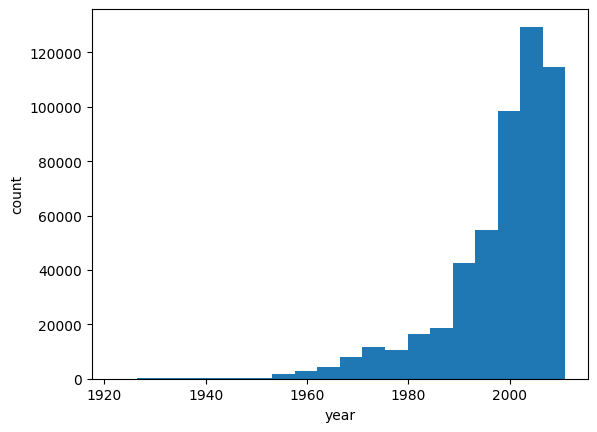

Range: 1922 - 2011
Unique values: 89


In [21]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [22]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

X_train.shape, X_test.shape

((386508, 90), (128837, 90))

## Полезные советы:

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Если вы чего-то не знаете, не стесняйтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению и `pytorch`. Но не забывайте, что за списанный код без ссылки на источник последует наказание.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так.

- Пользуйтесь утилитами, которые вам предоставляет `pytorch` (например, `Dataset` и `Dataloader`). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

- При желании вы можете логгировать метрики обучения и свои эксперименты в WandB либо любой другой сервис. Не забудьте приложить к тетрадке ссылку на результаты экспериментов либо скришноты графиков с пояснениями, что проверяющий должен на них увидеть.


- Финальное значение тестовой метрики для удобства проверки выведите в тетрадке.


## Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями.
2. Обучите `StandertScaler` и предобработайте ваши данные. В следующих заданиях можете использовать другой `scaler` или вообще отказаться от него.


In [14]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = set_global_seed(42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

model = ...
rmse_for_model = ...

# your code here  ⟅⎰᨟﹏᨟⎱⟆

Лучшая константа для RMSE это среднее. Используйте среднее, расчитанное на трэйне в качестве прогноза для теста и посчитайте для такой наивной модели RMSE.

In [ ]:
 # your code here  ⟅⎛ꌩωꌩ⎞⟆
best_rmse_metric = ... 

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию. Тестовую выборку мы будем использовать только для того, чтобы измерить итоговую метрику качества модели.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

## Часть I. Обучаем линейную регрессию (максимум 10 баллов)

**Задание 1 (10 баллов):** Обучите в `pytorch` линейную регрессию. 

- Создайте модель линейной регрессии, которая будет состоять только из одного `Linear()` слоя.
   
- Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки `pytorch`. Для подсчета градиента воспользуйтесь методом backward.
   
- Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
   
- Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача &mdash; убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [ ]:
# your code here (ง •̀_•́)ง

## Часть II. Заводим нейронную сеть (максимум 10 баллов)

Ниже нам предстоит реализовать довольно много различных нейросетей и поставить целую серию экспериментов. Чтобы это всё происходило без боли и страданий, нам нужно держать код в удобном виде.

При реении заданий вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. При необходимости вы можете добавить в них любые нужные вам аргументы и любой нужный функционал. Более того, хорошей практикой является не делать эти функции слишком громздкими и выносить разные хитрые штуки в отдельные функции.

In [ ]:
def training_epoch(model, optimizer, criterion, train_loader):
    """Одна эпоха обучения
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    """

    # your code here  ♪┏(・o･)┛♪

    raise NotImplementedError


@torch.no_grad()
def validation_epoch(model, criterion, val_loader):
    """Одна эпоха валидации модели
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """

    # your code here   ฅ^•ﻌ•^ฅ 

    raise NotImplementedError


@torch.no_grad()
def predict(model, data_loader):
    """ Предсказания модели
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    
    # your code here  =^･ω･^=

    predicts = torch.ones(len(test_loader.dataset))
    return predicts


def train(model, optimizer, criterion, train_loader, val_loader, epochs):
    """ Обучение модели
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        epochs - number of training epochs
    """
    
    # your code here  ¯\_(ツ)_/¯

    raise NotImplementedError

**Задание 2 (2 балла)**

Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве метрики качества мы используем RMSE. При его подсчёте вам нужно заменить предсказанный нейросеткой класс на конкретный год выпуска песни и использовать его как прогноз. 

In [ ]:
# your code here (￣ω￣)

**Задание 3 (1 балл).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** ... 


**Задание 4 (2 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [ ]:
# your code here ( ⚆ _ ⚆)

**Задание 5 (1 балл).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** ...

**Задание 6 (1 балл).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [ ]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # your code here ᕦ(ò_óˇ)ᕤ
    pass

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # your code here ( ⚆ ω ⚆)
    pass

**Задание 7 (1 балл)** Теперь повторите эксперимент из **задания 4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [ ]:
# your code here  ლ(ಠ益ಠლ)

**Задание 8 (2 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [ ]:
from sklearn.preprocessing import StandardScaler

 # your code here  ( ͡° ͜ʖ ͡°)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть III. Улучшаем нейронную сеть (максимум 10 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 9 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
# your code here  ( ཀ ʖ̯ ཀ)

**Задание 10 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

In [ ]:
# your code here  (๑-﹏-๑)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

**Задание 11 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

In [ ]:
# your code here (❍ᴥ❍ʋ)

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

**Задание 12 (1 балл).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению RMSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения). Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости RMSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [ ]:
# your code here (｡❤‿❤｡)

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

> Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.




**Задание 13 (6 баллов).**

Думаю направление размышлений вы поняли. Постарайтесь с помощью своих экспериментов выбить максимально возможное значение RMSE на тестовой выборке. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 8.90 $ &mdash; 2 балла
- $\text{RMSE} \le 8.80 $ &mdash; 4 балла
- $\text{RMSE} \le 8.75 $ &mdash; 6 баллов

**Различные трюки, которые можно попробовать:**

1. Попробуйте делать во время обучения раннюю остановку обучения и сохранять модель в тот момент, когда качество на валидации начало ухудшаься, то есть модель начала переобучаться
2. Попробуйте усложнить архитектуру нейросет
    - Больше/меньше нейронов
    - Больше/меньше слоёв
    - Другие функции активации (tanh, relu, leaky relu, elu etc)
    - Регуляризация (dropout, l1,l2)
3. Попробуйте другие оптимизаторы, а также смену скорости обучения по расписанию.

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... Попробовать несколько значений, как мы делали в заданиях выше, адекватно, но делать какой-то огромный перебор будет самоубийством.

Логгируйте свои эксперименты. За один прогон пробуйте одно изменение. Иначе будет непонятно какие именно изменения улучшили качество, а какие ухудшили. 

In [ ]:
# your code here
# ༼ つ ಥ_ಥ ༽つ

Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__

## Бонус (0.1 балла)

Прикрепите фотографию того, как вы начали этот сентябрь. Какую самую классную эмоцию вы испытали за прошедший месяц?

__место для картики и эмоции__
